In [3]:
# make sure to connect the shared drive to the resource folders
# https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-2.html

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import json
import tensorflow.keras as keras
# https://keras.io/guides/

# import data from json file we made with data preparation
# edit the json name for the segments you're training/testing
with open ('/content/drive/MyDrive/Colab Notebooks/CS412 Final - Music Classification/12_segments.json') as j:
  dataset = json.load(j)

# get the mfcc and labels for the music files
mfcc = np.array(dataset['mfcc'])
classes = np.array(dataset['class'])

print('Data ready -> mfcc, classes')

Data ready -> mfcc, classes


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mfcc, classes, test_size=0.2)
print('Created X_train, X_test, y_train, y_test')

Created X_train, X_test, y_train, y_test


In [5]:
# kears library allows you to buld a neural network
# neural networks are built on layers, and keras is a good choice for this case
# https://keras.io/api/models/sequential/

neural_model = keras.Sequential([
  # specify layer shape
  keras.layers.Flatten(input_shape=(mfcc.shape[1], mfcc.shape[2])),
  # layer 1, utilizing rectified linear unit 'relu' instead of 'sigmoid'
  # relu > sigmoid for vanishing gradient
  keras.layers.Dense(512, activation='relu'),
  # layer 2
  keras.layers.Dense(512/2, activation='relu'),
  # layer 3
  keras.layers.Dense(512/4, activation='relu'),
  # output layer
  # softmax -> normalized neurons
  keras.layers.Dense(10, activation='softmax')

])

In [6]:
# https://keras.io/api/optimizers/
# create an optimizer 
# using stochastic gradient descent method 'Adam'
lr = 0.001
opt = keras.optimizers.Adam(learning_rate=lr)
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy
neural_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
neural_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1404)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               719360    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 884,874
Trainable params: 884,874
Non-trainable params: 0
_________________________________________________________________


In [7]:
# training our model
# https://keras.io/api/models/model_training_apis/

h = neural_model.fit(X_train, 
                 y_train, 
                 validation_data=(X_test, y_test), 
                 epochs=70,     # iterations over X_train
                 batch_size=64  # n of samples in a batch to calculate the gradient
                 )


Epoch 1/70
150/150 [==============================] - 5s 28ms/step - loss: 21.2282 - accuracy: 0.2931 - val_loss: 2.1370 - val_accuracy: 0.4108
Epoch 2/70
150/150 [==============================] - 4s 26ms/step - loss: 1.8274 - accuracy: 0.4516 - val_loss: 1.8304 - val_accuracy: 0.4842
Epoch 3/70
150/150 [==============================] - 4s 25ms/step - loss: 1.3969 - accuracy: 0.5349 - val_loss: 1.5195 - val_accuracy: 0.5104
Epoch 4/70
150/150 [==============================] - 4s 25ms/step - loss: 1.1263 - accuracy: 0.6066 - val_loss: 1.4159 - val_accuracy: 0.5342
Epoch 5/70
150/150 [==============================] - 4s 27ms/step - loss: 1.0349 - accuracy: 0.6412 - val_loss: 1.3679 - val_accuracy: 0.5530
Epoch 6/70
150/150 [==============================] - 4s 26ms/step - loss: 0.9435 - accuracy: 0.6734 - val_loss: 1.4079 - val_accuracy: 0.5559
Epoch 7/70
150/150 [==============================] - 4s 27ms/step - loss: 0.8267 - accuracy: 0.7148 - val_loss: 1.3338 - val_accuracy: 0.568

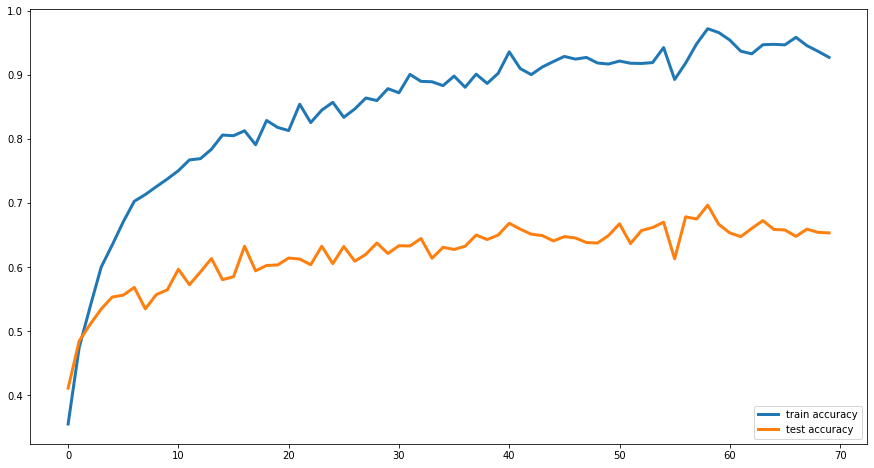

In [8]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import matplotlib.pyplot as plt

# plot two stats, accuracy for training and test
plt.figure(figsize=(15,8))
plt.plot(h.history["accuracy"], label="train accuracy", linewidth=3)
plt.plot(h.history["val_accuracy"], label="test accuracy", linewidth=3)
plt.legend(loc='lower right')

# From these results, accuracy is about 65% 
# need to fix overfitting


In [9]:
# can implement dropout and regularization to fix the outliers 
# https://keras.io/api/layers/regularization_layers/dropout/
# https://keras.io/api/layers/regularizers/

neural_model = keras.Sequential([
  # specify layer shape
  keras.layers.Flatten(input_shape=(mfcc.shape[1], mfcc.shape[2])),
  # layer 1, utilizing rectified linear unit 'relu' instead of 'sigmoid'
  # relu > sigmoid for vanishing gradient
  keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.2),
  # layer 2
  keras.layers.Dense(512/2, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.2),
  # layer 3
  keras.layers.Dense(512/4, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.2),
  # output layer
  # softmax -> normalized neurons
  keras.layers.Dense(10, activation='softmax')

])

In [10]:
lr = 0.001
opt = keras.optimizers.Adam(learning_rate=lr)
neural_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

h = neural_model.fit(X_train, 
                 y_train, 
                 validation_data=(X_test, y_test), 
                 epochs=100,     # iterations over X_train
                 batch_size=128  # n of samples in a batch to calculate the gradient
                 )

Epoch 1/100
75/75 [==============================] - 4s 41ms/step - loss: 26.3612 - accuracy: 0.1826 - val_loss: 3.2069 - val_accuracy: 0.3082
Epoch 2/100
75/75 [==============================] - 3s 36ms/step - loss: 3.3953 - accuracy: 0.2671 - val_loss: 3.0689 - val_accuracy: 0.3657
Epoch 3/100
75/75 [==============================] - 3s 35ms/step - loss: 3.1721 - accuracy: 0.3040 - val_loss: 2.8804 - val_accuracy: 0.3945
Epoch 4/100
75/75 [==============================] - 3s 34ms/step - loss: 3.0108 - accuracy: 0.3402 - val_loss: 2.8055 - val_accuracy: 0.3999
Epoch 5/100
75/75 [==============================] - 3s 36ms/step - loss: 2.9049 - accuracy: 0.3602 - val_loss: 2.7800 - val_accuracy: 0.4016
Epoch 6/100
75/75 [==============================] - 3s 36ms/step - loss: 2.8437 - accuracy: 0.3684 - val_loss: 2.6380 - val_accuracy: 0.4224
Epoch 7/100
75/75 [==============================] - 3s 36ms/step - loss: 2.7092 - accuracy: 0.3991 - val_loss: 2.5169 - val_accuracy: 0.4558
Epoch

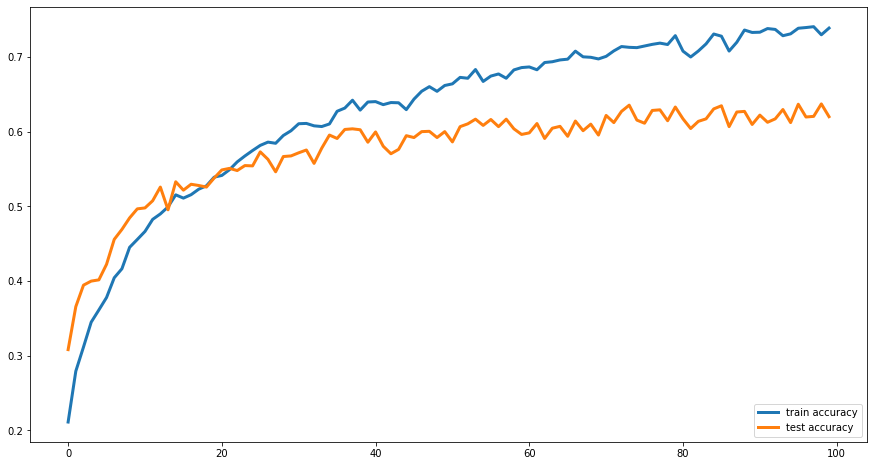

In [11]:
# plot two stats, accuracy for training and test
plt.figure(figsize=(15,8))
plt.plot(h.history["accuracy"], label="train accuracy", linewidth=3)
plt.plot(h.history["val_accuracy"], label="test accuracy", linewidth=3)
plt.legend(loc='lower right')

In [23]:
from sklearn.metrics import classification_report

y_pred = neural_model.predict(X_test, batch_size=128, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

19/19 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       235
           1       0.86      0.86      0.86       248
           2       0.79      0.45      0.57       236
           3       0.59      0.58      0.58       244
           4       0.62      0.36      0.46       231
           5       0.67      0.83      0.74       257
           6       0.52      0.42      0.46       230
           7       0.59      0.64      0.61       247
           8       0.39      0.61      0.48       218
           9       0.55      0.57      0.56       252

    accuracy                           0.62      2398
   macro avg       0.63      0.62      0.61      2398
weighted avg       0.63      0.62      0.62      2398

